# Personal Communication Network Project
Dharma Teja Bhattu and Collin Stratton

CST-440

Dr. Isac Artzi

2/13/2022

# Introduction
The purpose of this assignment was to take the dataset consists of 21 people provided by Dr. Isac Artzi to see who they are connected with. If an individual is connected with someone, the value is 1, and if not, the value is 0. The value is also 0 if a person tries to connect to themselves. The analysis performed on this data will include creating a directed graph, finding the density of the data, finding the different degrees of the centrality of the data, and finding cliques within the data.

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import json

In [7]:
# read in the data
df = pd.read_csv('./Week6_data.csv', header=0, index_col=0)

# create dict of headers
header_dict = {}
for i in range(len(list(df))):
    header_dict[i] = list(df)[i]

# create rows and columns for the graph
rows, cols = np.where(df == 1)

# create a list of edges from the rows and columns
edges = zip(rows.tolist(), cols.tolist())

# Directed Graph
A graph was plotted of the network to see how everyone in the dataset was connected. It appears that everyone is heavily connected within this dataset, but a couple of people that stood out were Kristina and Marylouise with the number of connections they have. Further analysis on the density and centrality of the graph will be performed next.

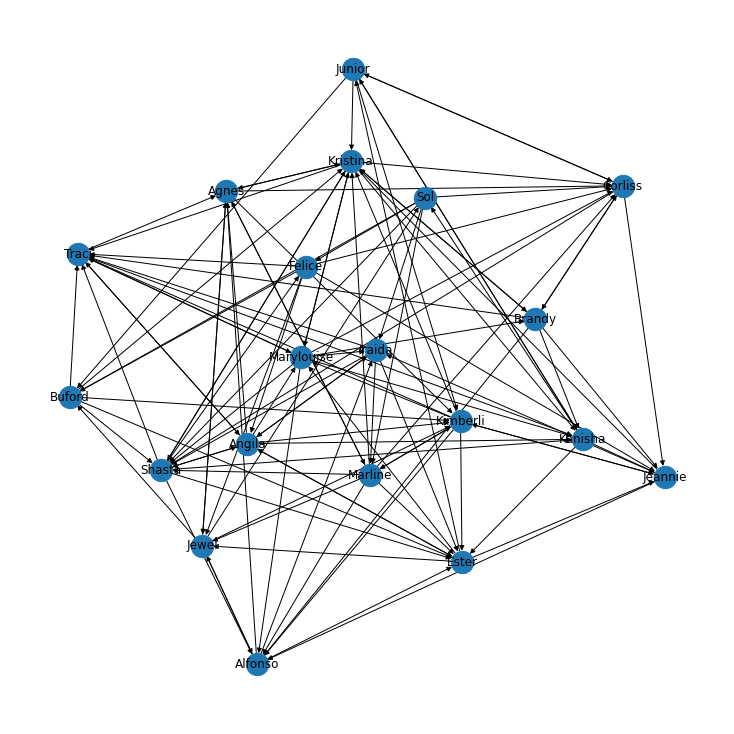

In [8]:
# create the graph
gr = nx.DiGraph()
gr.add_edges_from(edges)

# plot the graph
plt.figure(1, figsize=(10, 10))
nx.draw(gr, node_size=500, labels=header_dict, with_labels=True)
plt.show()

# Further Analysis
Some clear candidates appear to have the strongest centrality in the dataset from the graph. However, just looking at the graph is insufficient in genuinely understanding the data. The following section finds who has the strongest in-degree centrality, who has the strongest out-degree centrality, and who has the strongest degree centrality and looks at the graph's density.

In-degree centrality measures the number of edges others have initiated with a vertex, while out-degree centrality counts the number of edges a vertex has initiated with others. Based on the analysis, Kristina has the strongest In-Degree Centrality, which means she interacts with her the most out of everyone in the group. Marylouise has the strongest out-degree centrality, which means that she does the most interaction with other people. Kristina has the strongest degree of centrality out of everyone, which shows that she has the most connections out of everyone in the dataset.

In [9]:
# find the density and centrality of the graph
den = nx.density(gr)
incen = nx.in_degree_centrality(gr)
outcen = nx.out_degree_centrality(gr)
cen = nx.degree_centrality(gr)

# change dict numbers to names
for i in range(len(cen.keys())):
    incen[header_dict[i]] = incen.pop(i)
    outcen[header_dict[i]] = outcen.pop(i)
    cen[header_dict[i]] = cen.pop(i)

# print the results
print("In-degree centrality: ", json.dumps(incen, indent=4))
print("Out-degree centrality: ", json.dumps(outcen, indent=4))
print("Degree centrality: ", json.dumps(cen, indent=4))

print("\n")
print("Density: ", json.dumps(den, indent=4))
print("\n")

print("Strongest In-degree is", max(incen, key=incen.get), "with centrality:\t", max(incen.values()))
print("Strongest Out-degree is", max(outcen, key=outcen.get), "with centrality:\t", max(outcen.values()))
print("Strongest Degree is", max(cen, key=cen.get), "with centrality:\t\t", max(cen.values()))

In-degree centrality:  {
    "Kimberli": 0.3684210526315789,
    "Marylouise": 0.2631578947368421,
    "Jewel": 0.2631578947368421,
    "Angila": 0.2631578947368421,
    "Buford": 0.21052631578947367,
    "Kanisha": 0.3684210526315789,
    "Jeannie": 0.3157894736842105,
    "Ester": 0.42105263157894735,
    "Alfonso": 0.3684210526315789,
    "Sol": 0.10526315789473684,
    "Corliss": 0.42105263157894735,
    "Kristina": 0.47368421052631576,
    "Felice": 0.10526315789473684,
    "Shasta": 0.42105263157894735,
    "Brandy": 0.15789473684210525,
    "Junior": 0.15789473684210525,
    "Traci": 0.47368421052631576,
    "Agnes": 0.3157894736842105,
    "Marline": 0.21052631578947367,
    "Iraida": 0.2631578947368421
}
Out-degree centrality:  {
    "Kimberli": 0.3684210526315789,
    "Marylouise": 0.42105263157894735,
    "Jewel": 0.2631578947368421,
    "Angila": 0.42105263157894735,
    "Buford": 0.2631578947368421,
    "Kanisha": 0.21052631578947367,
    "Jeannie": 0.21052631578947367,
  

# Cliques
A Clique in this context is when two or more people have a two-way connection. For example, Ester is connected to Junior, and Junior is connected back with Ester, making it a Clique. If Ester is connected with Junior and Junior is connected back with Ester, then it is not a Clique. The below list is for all the different groups of cliques in the network.

In [10]:
# find cliques in the graph
cliques = list(nx.find_cliques_recursive(gr))

# change node numbers to names
for i in range(len(cliques)):
    cliques[i] = [header_dict[x] for x in cliques[i]]

# output cliques
cliques

[['Kimberli', 'Marylouise', 'Alfonso'],
 ['Kimberli', 'Marylouise', 'Kristina', 'Traci'],
 ['Kimberli', 'Marline', 'Alfonso', 'Ester'],
 ['Kimberli', 'Marline', 'Kristina'],
 ['Kimberli', 'Jeannie', 'Alfonso'],
 ['Kimberli', 'Jeannie', 'Kristina'],
 ['Marylouise', 'Alfonso', 'Iraida'],
 ['Marylouise', 'Iraida', 'Shasta', 'Traci'],
 ['Marylouise', 'Kristina', 'Shasta', 'Traci', 'Kanisha'],
 ['Marylouise', 'Kristina', 'Brandy', 'Traci', 'Kanisha'],
 ['Marylouise', 'Kristina', 'Brandy', 'Corliss'],
 ['Jewel', 'Sol', 'Buford'],
 ['Buford', 'Shasta', 'Kristina', 'Traci'],
 ['Buford', 'Shasta', 'Ester'],
 ['Jeannie', 'Iraida'],
 ['Ester', 'Junior'],
 ['Sol', 'Marline', 'Corliss', 'Shasta'],
 ['Sol', 'Felice', 'Corliss'],
 ['Junior', 'Kristina', 'Corliss'],
 ['Junior', 'Kristina', 'Kanisha'],
 ['Agnes', 'Corliss'],
 ['Marline', 'Corliss', 'Shasta'],
 ['Marline', 'Shasta', 'Kristina']]

# Conclusion
After printing the initial network, it gave us a basic understanding of how people in the dataset are connected; however, it is hard to make any further analysis of the data through only visual analysis of the graph. We then found the in-degree, out-degree and degree centrality to see who has the most connections which happens to be Kristina. We then continued to find all the different cliques that existed in the network, and it turns out there are 23 different cliques. Further analysis could have been done using an MDS graph, however, there were many issues that came with trying to create an MDS graph from the dataset provided. Specifically, creating an adjacency list from the dataset that would fit into the MDS function was not accomplished, and thus an MDS graph was not created. If the MDS graph were to be created, it would provide another visual analysis of how people in the dataset are connected.

# References
https://www.sciencedirect.com/topics/computer-science/degree-centrality

https://cambridge-intelligence.com/social-network-analysis/

https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/